## Install Required Libraries
Install the necessary libraries, including Gymnasium, Stable Baselines3, and SB3 Contrib.

In [2]:
# Importing required modules
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, DQN, A2C
from stable_baselines3.common.evaluation import evaluate_policy

from sb3_contrib import MaskablePPO
from sb3_contrib.common.wrappers import ActionMasker
from vizualization import plot_results

%load_ext tensorboard

# Import BoundedKnapsack Environment
from knapsack_env import BoundedKnapsackEnv

# Setting the seed for reproducibility
seed = 2024
np.random.seed(seed)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
# Define global variables
TIME_STEPS = 10000
EVAL_EPISODES = 100   
EVAL_FREQ = int(TIME_STEPS**0.5)     
VERBOSE = 0

# Create an Instance of the Environment
Create an instance of the BoundedKnapsack environment with the specified parameters.

In [4]:
# Enable the environment
env = BoundedKnapsackEnv(n_items=200, max_weight=200)

# Inspect the state space and action spaces
state_space = env.reset()
action_space_size = env.action_space.n

# Print the state space and action space size
print(f"State Space: {state_space}")
print(f"Action Space Size: {action_space_size}")

State Space: (array([[ 82,  65,  60,  69,  35,  87,  35,  48,  40,  23,  15,  86,   3,
         41,  26,  64,  42,  52,  95,  67,  17,  45,  93,  30,  53,  50,
         20,  74,  49,  66,   5,  48,  51,  19,  71,  51,  10,  93,  44,
         55,  28,  93,  31,  37,  88,  30,   6,   3,   9,   9,  37,  15,
         38,  83,  39,  26,  33,  98,  69,  82,  25,  90,  18,  57,  95,
         95,  60,  65,  38,  86,  57,  80,  75,  70,  10,  19,  20,  66,
         57,  42,  36,  30,  63,  35,  22,  34,  59,  80,  48,  56,  70,
         55,  20,  21,  83,  57,  43,  66,  71,  79,   3,  99,   7,  54,
         58,  79,  69,  43,  40,   6,  34,  73,  15,  19,  32,  82,  31,
          9,   2,  31,  54,  83,  68,  44,  59,  41,  63,  28,  95,  48,
         36,  98,  91,  71,  39,  31,  60,  11,  33,  10,  94,  93,  30,
         36,  34,  20,  99,  80,  85,  89,  49,  79,  85,  76,   3,  50,
         63,  11,  83,  40,  23,  68,  29,  55,  43,  12,  28,  21,  52,
         52,  44,  45,  46,  93,  24,

# Train and Test DRL Agents
Train and test at least two different DRL agents using the algorithms provided in Stable Baselines3 with default hyperparameters.

Eval num_timesteps=100, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
New best mean reward!
Eval num_timesteps=200, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
Eval num_timesteps=300, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
Eval num_timesteps=400, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
Eval num_timesteps=500, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
Eval num_timesteps=600, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
Eval num_timesteps=700, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
Eval num_timesteps=800, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
Eval num_timesteps=900, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
Eval num_timesteps=1000, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
Eval num_timesteps=1100, episode_reward=68.00 +/- 0.00
Episode length: 3.00 +/- 0.00
Eval num_timesteps=1200, episode_reward=68.00 +/- 0.

c:\Users\20191678\AppData\Local\anaconda3\envs\torch-gpu\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 4.84GB > 4.69GB
  warnings.warn(


Eval num_timesteps=100, episode_reward=428.00 +/- 0.00
Episode length: 6.00 +/- 0.00
New best mean reward!
Eval num_timesteps=200, episode_reward=88.00 +/- 0.00
Episode length: 2.00 +/- 0.00
Eval num_timesteps=300, episode_reward=88.00 +/- 0.00
Episode length: 2.00 +/- 0.00
Eval num_timesteps=400, episode_reward=88.00 +/- 0.00
Episode length: 2.00 +/- 0.00
Eval num_timesteps=500, episode_reward=88.00 +/- 0.00
Episode length: 2.00 +/- 0.00
Eval num_timesteps=600, episode_reward=88.00 +/- 0.00
Episode length: 2.00 +/- 0.00
Eval num_timesteps=700, episode_reward=88.00 +/- 0.00
Episode length: 2.00 +/- 0.00
Eval num_timesteps=800, episode_reward=88.00 +/- 0.00
Episode length: 2.00 +/- 0.00
Eval num_timesteps=900, episode_reward=88.00 +/- 0.00
Episode length: 2.00 +/- 0.00
Eval num_timesteps=1000, episode_reward=88.00 +/- 0.00
Episode length: 2.00 +/- 0.00
Eval num_timesteps=1100, episode_reward=88.00 +/- 0.00
Episode length: 2.00 +/- 0.00
Eval num_timesteps=1200, episode_reward=88.00 +/- 0

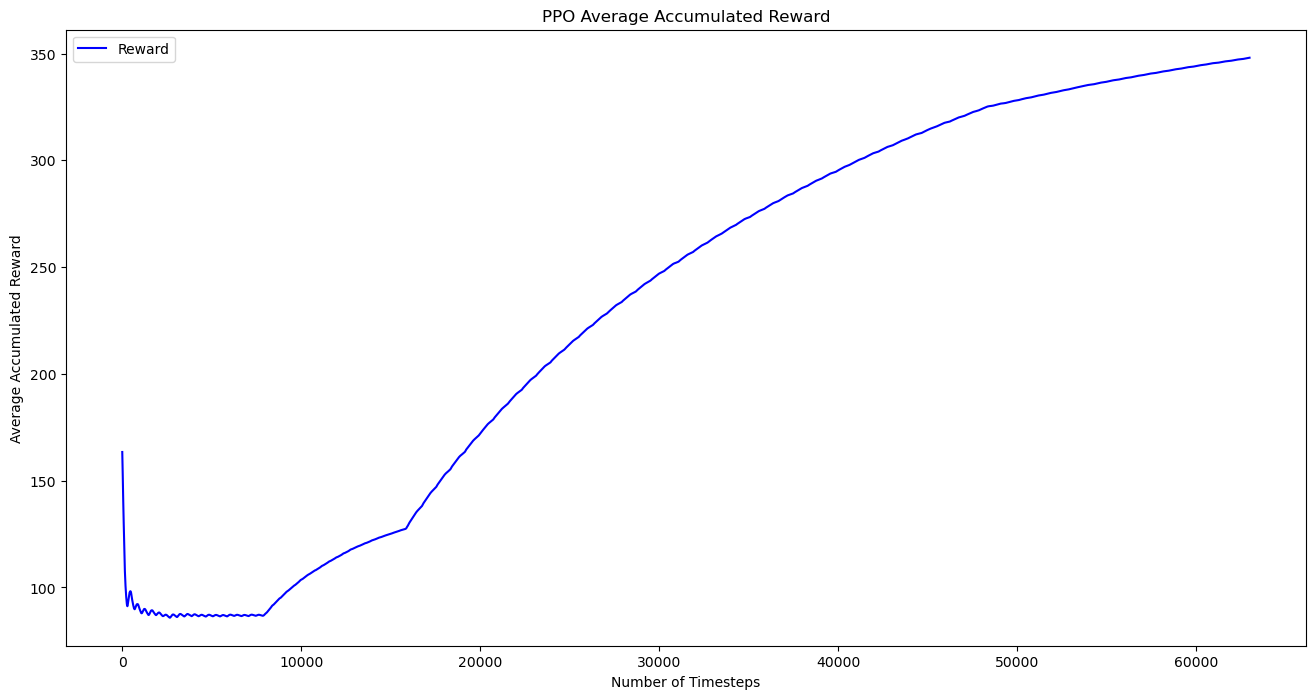

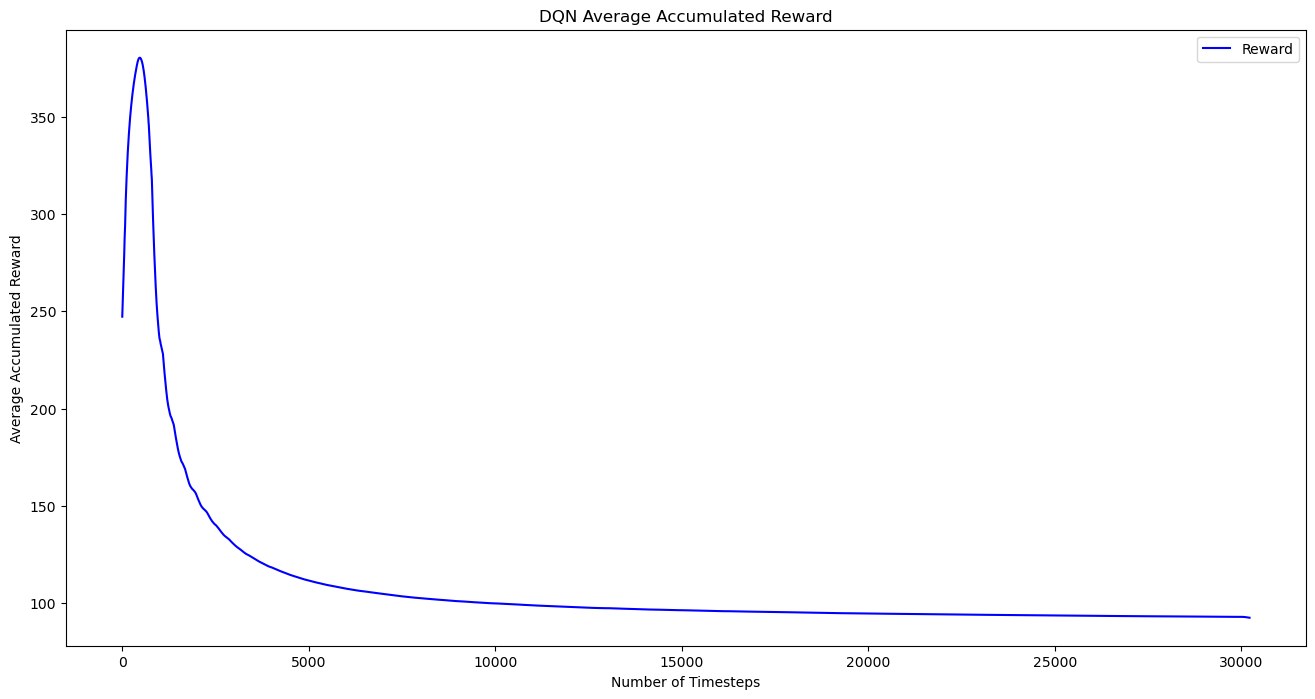

In [5]:
# Define the policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.Tanh, net_arch=[64, 64])

# Create a log directory
log_dir = './logs/'
os.makedirs(log_dir, exist_ok=True)

# Create separate instances of the environment for PPO and DQN
env_ppo_base = BoundedKnapsackEnv(n_items=200, max_weight=200, mask=False)
env_dqn_base = BoundedKnapsackEnv(n_items=200, max_weight=200, mask=False)

# Wrap the environments with Monitor
env_ppo = Monitor(env_ppo_base, log_dir + 'ppo/')
env_dqn = Monitor(env_dqn_base, log_dir + 'dqn/')

# Setup evaluation callback for logging
eval_callback_ppo = EvalCallback(env_ppo, best_model_save_path='./models/ppo/',
                                 log_path=log_dir + 'ppo/', eval_freq=EVAL_FREQ, n_eval_episodes=EVAL_EPISODES,
                                 deterministic=True, render=False)

eval_callback_dqn = EvalCallback(env_dqn, best_model_save_path='./models/dqn/',
                                 log_path=log_dir + 'dqn/', eval_freq=EVAL_FREQ, n_eval_episodes=EVAL_EPISODES,
                                 deterministic=True, render=False)

# Define the policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.Tanh, net_arch=[64, 64])

# Training the PPO agent
ppo_model = PPO("MlpPolicy", env_ppo, policy_kwargs=policy_kwargs, verbose=VERBOSE, tensorboard_log=log_dir + 'ppo/')
ppo_model.learn(total_timesteps=TIME_STEPS, callback=eval_callback_ppo)

# Training the DQN agent
dqn_model = DQN("MlpPolicy", env_dqn, policy_kwargs=policy_kwargs, verbose=VERBOSE)
dqn_model.learn(total_timesteps=TIME_STEPS, callback=eval_callback_dqn)

# # Evaluating the PPO agent
# mean_reward_ppo, std_reward_ppo = evaluate_policy(ppo_model, env_ppo, n_eval_episodes=EVAL_EPISODES)
# print(f"Mean reward for PPO agent: {mean_reward_ppo} +/- {std_reward_ppo}")

# # Evaluating the DQN agent
# mean_reward_dqn, std_reward_dqn = evaluate_policy(dqn_model, env_dqn, n_eval_episodes=EVAL_EPISODES)
# print(f"Mean reward for DQN agent: {mean_reward_dqn} +/- {std_reward_dqn}")

# Plotting the results for PPO
plot_results(log_dir + 'ppo/', 'PPO Average Accumulated Reward', window=50)

# Plotting the results for DQN
plot_results(log_dir + 'dqn/', 'DQN Average Accumulated Reward', window=50)

# Experiment with Different Neural Network Architectures
Experiment with different neural network architectures for the DRL agents with default hyperparameters.

In [ ]:
# Define the policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=[128, 128])

# Training the PPO agent
ppo_model_large = PPO("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE)
ppo_model_large.learn(total_timesteps=TIME_STEPS)

# Training the DQN agent
dqn_model_large = DQN("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE)
dqn_model_large.learn(total_timesteps=TIME_STEPS)

# Evaluating the PPO agentP
mean_reward, std_reward = evaluate_policy(ppo_model_large, env, n_eval_episodes=EVAL_EPISODES)

print(f"Mean reward for PPO agent: {mean_reward} +/- {std_reward}")

# Evaluating the DQN agent
mean_reward, std_reward = evaluate_policy(dqn_model_large, env, n_eval_episodes=EVAL_EPISODES)

print(f"Mean reward for DQN agent: {mean_reward} +/- {std_reward}")

# Tune the Algorithms Hyperparameters
Tune the hyperparameters of the algorithms by hand.

In [ ]:
# Define the policy network architecture
policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=[128, 128])

# Tuning the hyperparameters of the PPO agent
ppo_model_tuned = PPO("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE, learning_rate=0.0003, n_steps=2048, batch_size=64, n_epochs=10, gamma=0.99, gae_lambda=0.95, clip_range=0.2)
ppo_model_tuned.learn(total_timesteps=TIME_STEPS)

# Evaluating the PPO agent
mean_reward_ppo, std_reward_ppo = evaluate_policy(ppo_model_tuned, env, n_eval_episodes=EVAL_EPISODES)
print(f"Mean reward for PPO agent after hyperparameter tuning: {mean_reward} +/- {std_reward}")

# Tuning the hyperparameters of the DQN agent
dqn_model_tuned = DQN("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE, learning_rate=0.0005, buffer_size=10000, learning_starts=1000, batch_size=64, tau=1.0, gamma=0.99, train_freq=4, gradient_steps=1)
dqn_model_tuned.learn(total_timesteps=TIME_STEPS)

# Evaluating the DQN agent
mean_reward_dqn, std_reward_dqn = evaluate_policy(dqn_model_tuned, env, n_eval_episodes=EVAL_EPISODES)
print(f"Mean reward for DQN agent after hyperparameter tuning: {mean_reward} +/- {std_reward}")

# Tuning the hyperparameters of the A2C agent
a2c_model_tuned = A2C("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=VERBOSE, learning_rate=0.0007, n_steps=5, gamma=0.99, gae_lambda=1.0, ent_coef=0.0, vf_coef=0.5, max_grad_norm=0.5, use_rms_prop=False, use_sde=False)
a2c_model_tuned.learn(total_timesteps=TIME_STEPS)

# Evaluating the A2C agent
mean_reward_a2c, std_reward_a2c = evaluate_policy(a2c_model_tuned, env, n_eval_episodes=EVAL_EPISODES)
print(f"Mean reward for A2C agent after hyperparameter tuning: {mean_reward} +/- {std_reward}")

# Evaluate the Agents and Compare Results
Evaluate the performance of the agents and compare the best results obtained using the different algorithms.

In [ ]:
# Define the agents and their corresponding mean rewards and standard deviations
agents = ['PPO', 'DQN', 'A2C']
mean_rewards = [mean_reward_ppo, mean_reward_dqn, mean_reward_a2c]
std_rewards = [std_reward_ppo, std_reward_dqn, std_reward_a2c]

# Plotting the mean rewards
plt.figure(figsize=(10, 5))
plt.bar(agents, mean_rewards, yerr=std_rewards, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.ylabel('Mean Reward')
plt.title('Comparison of Mean Rewards of Different Agents')
plt.show()

In [ ]:
# Define the agents and their corresponding mean rewards, standard deviations, and models
agents = ['PPO', 'DQN', 'A2C']
mean_rewards = [mean_reward_ppo, mean_reward_dqn, mean_reward_a2c]
models = [ppo_model_tuned, dqn_model_tuned, a2c_model_tuned]

# Determine the index of the best model
best_index = np.argmax(mean_rewards)

# Save the best model
models[best_index].save("models/best_model_part1")

print(f"The best model is {agents[best_index]} with a mean reward of {mean_rewards[best_index]}")

---

# Part 2

---

## Enabling action masking, train and test a MaskablePPO agent

In [ ]:
# Define a function for the mask
def mask_fn(env):
    return env.get_mask()

# Create an instance of the environment with mask enabled
env = BoundedKnapsackEnv(n_items=200, max_weight=200, mask=True)

# Wrap the environment with the ActionMasker
vec_env = ActionMasker(env, mask_fn)

# Define the policy architecture
policy_kwargs = dict(
    net_arch=[dict(pi=[128, 128, 128], vf=[128, 128, 128])],  
)

# Train a MaskablePPO agent
model = MaskablePPO(
    "MlpPolicy",
    vec_env,
    policy_kwargs=policy_kwargs,
    verbose=VERBOSE,
    n_steps=2048,
    batch_size=64,
    learning_rate=3e-4,
    ent_coef=0.0,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    vf_coef=0.5,
    max_grad_norm=0.5,
    target_kl=None,
)

# Adjust timesteps for meaningful training
model.learn(total_timesteps=TIME_STEPS, use_masking=True)

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=EVAL_EPISODES)

print(f"Mean reward: {mean_reward} +/- {std_reward}")

## Experiment with different neural network architectures and tune the algorithm hyperparameters

In [ ]:
# Define a list of configurations to experiment with
configurations = [
    {
        "policy_kwargs": dict(net_arch=[dict(pi=[64, 64], vf=[64, 64])]),
        "learning_rate": 3e-4,
        "n_steps": 2048,
        "batch_size": 64,
    },
    {
        "policy_kwargs": dict(net_arch=[dict(pi=[256, 256], vf=[256, 256])]),
        "learning_rate": 1e-3,
        "n_steps": 1024,
        "batch_size": 128,
    },
    {
        "policy_kwargs": dict(net_arch=[dict(pi=[128, 128], vf=[128, 128])]),
        "learning_rate": 1e-4,
        "n_steps": 4096,
        "batch_size": 32,
    },
]

# Initialize best mean reward to negative infinity
best_mean_reward = -np.inf

# Loop over the architectures and learning rates
for config in configurations:
    policy_kwargs = config["policy_kwargs"]
    model = MaskablePPO(
        "MlpPolicy",
        vec_env,
        policy_kwargs=policy_kwargs,
        verbose=VERBOSE,
        n_steps=config["n_steps"],
        batch_size=config["batch_size"],
        learning_rate=config["learning_rate"],
        ent_coef=0.0,
        gamma=0.99,
        gae_lambda=0.95,
        clip_range=0.2,
        vf_coef=0.5,
        max_grad_norm=0.5,
        target_kl=None,
    )
    model.learn(total_timesteps=TIME_STEPS, use_masking=True)
    mean_reward_mppo, std_reward_mppo = evaluate_policy(model, env, n_eval_episodes=EVAL_EPISODES)
    print(f"Architecture: {config['policy_kwargs']['net_arch']}, Learning Rate: {config['learning_rate']}, Mean reward: {mean_reward} +/- {std_reward}")    
    # If this mean reward is greater than the current best, save this model
    if mean_reward_mppo > best_mean_reward:
        best_mean_reward = mean_reward_mppo
        model.save("models/best_model_part2")
        print(f"New best mean reward: {mean_reward_mppo} +/- {std_reward_mppo}, model saved.")

## Evaluate the agent and compare the best results obtained with those of the best agent from Part 1.

In [ ]:
# Load the best model from Part 1
if agents[best_index] == 'PPO':
    best_model_part1 = PPO.load("best_model_part1", env=env)
elif agents[best_index] == 'DQN':
    best_model_part1 = DQN.load("best_model_part1", env=env)
elif agents[best_index] == 'A2C':
    best_model_part1 = A2C.load("best_model_part1", env=env)
else:
    print("Unknown model type")
    
# Load the best model from Part 2
best_model_part2 = MaskablePPO.load("best_model_part2", env=env)

# Evaluate the best model from Part 1
mean_reward_part1, std_reward_part1 = evaluate_policy(best_model_part1, env, n_eval_episodes=EVAL_EPISODES)

# Evaluate the best model from Part 2
mean_reward_part2, std_reward_part2 = evaluate_policy(best_model_part2, env, n_eval_episodes=EVAL_EPISODES)

# Print the results
print(f"Part 1 - Mean reward: {mean_reward_part1} +/- {std_reward_part1}")
print(f"Part 2 - Mean reward: {mean_reward_part2} +/- {std_reward_part2}")